In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_gp,G/loss_fake,G/loss_rec,G/loss_cls
0,0:00:06,100,-4.3056,-0.6835,1.4884,0.0361,0.1200,0.3029,1.6869
1,0:00:10,200,-3.0616,-0.1526,1.1687,0.0406,-0.1398,0.1493,1.3479
2,0:00:14,300,-2.0333,-0.7339,1.0624,0.0271,0.7004,0.1205,1.6686
3,0:00:18,400,-2.3128,0.2033,0.8347,0.0323,0.6877,0.1078,0.9978
4,0:00:23,500,-1.3093,-0.8751,1.0545,0.0064,0.8423,0.0929,0.9340


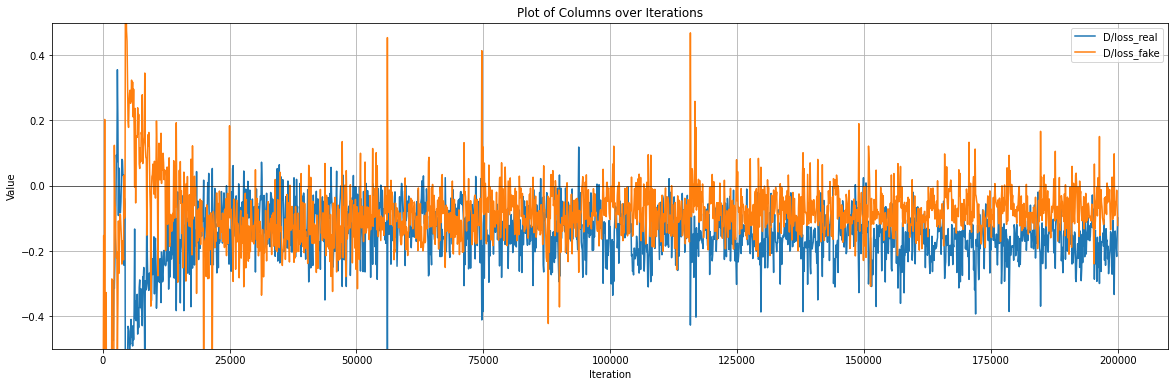

In [5]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.5, 0.5))

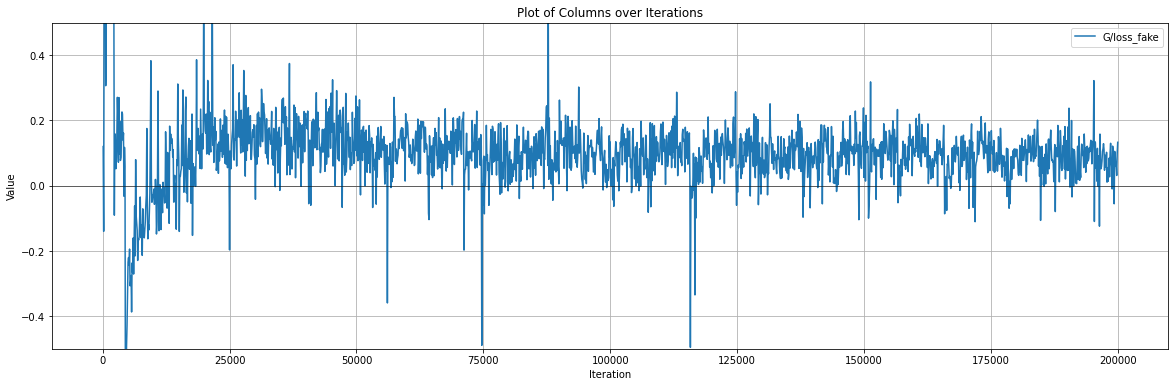

In [7]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.5, 0.5))

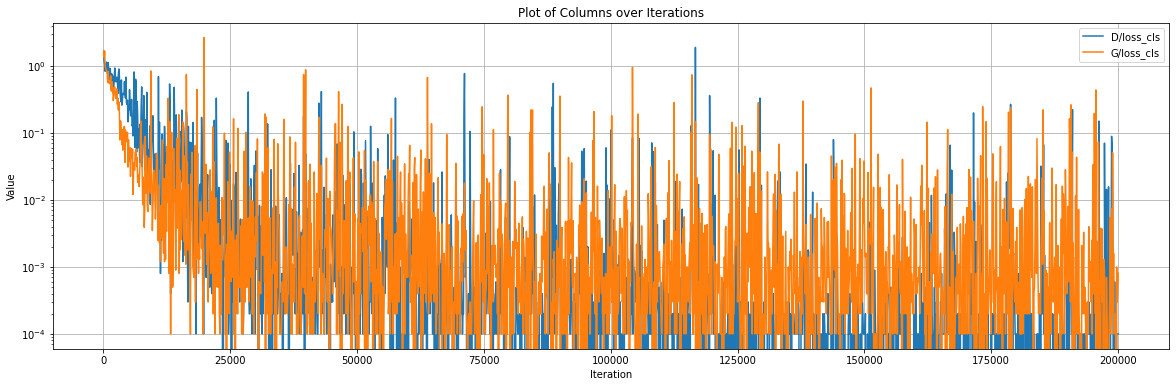

In [17]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

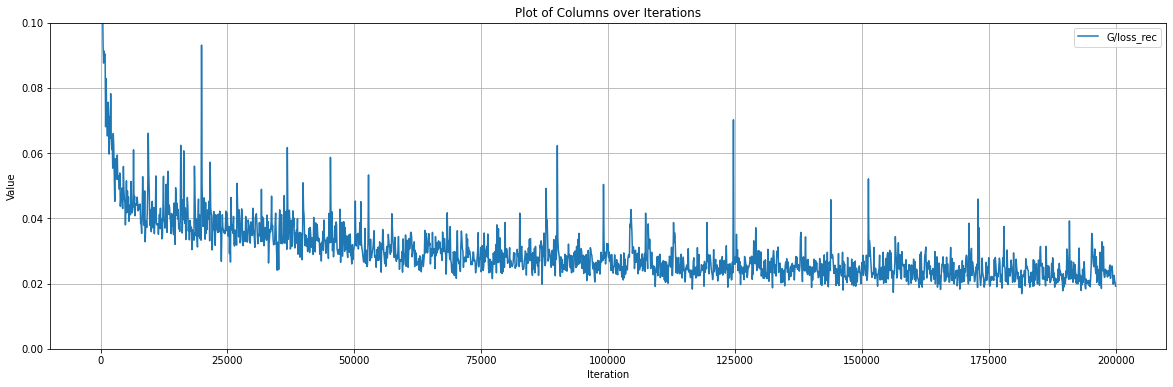

In [14]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.1))

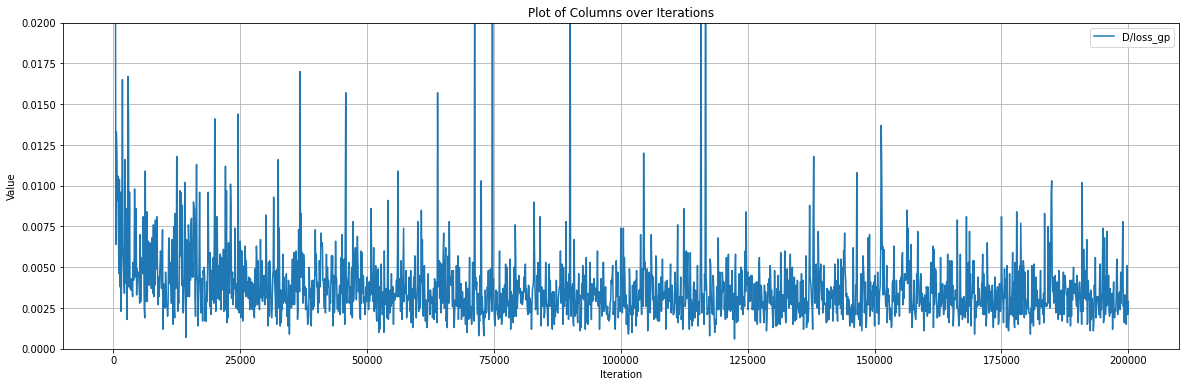

In [23]:
plot_columns(history, ['D/loss_gp'], logaxis=False, ylim=(0, 0.02))

# Metrics

## TSTR Score

In [24]:
file_path = 'results/TSTR_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,source,domain,accuracy,loss
0,10000,WAL,10,0.893791,0.270396
1,10000,WAL,11,0.944923,0.129880
2,10000,WAL,12,0.812825,0.619614
3,10000,WAL,13,0.965517,0.070681
4,10000,WAL,14,0.688468,1.607184


Maximum average accuracy: 0.9511 at step 200000


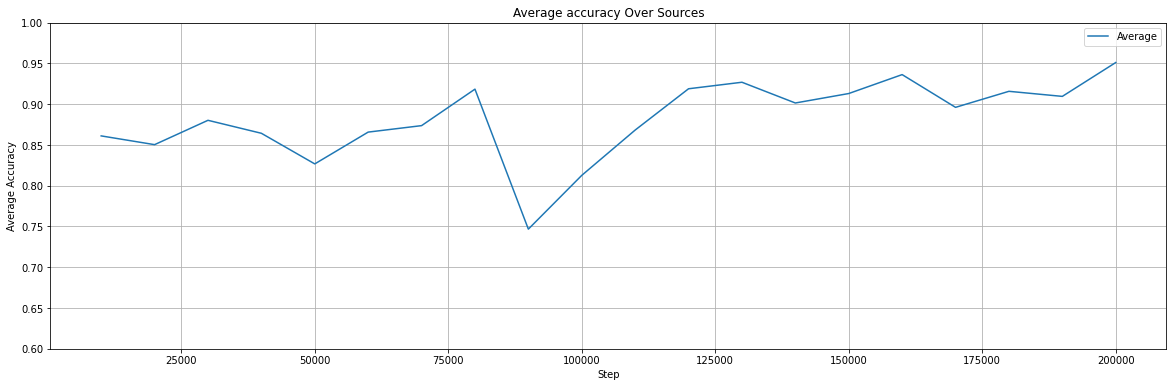

Minimum average loss: 0.1636 at step 200000


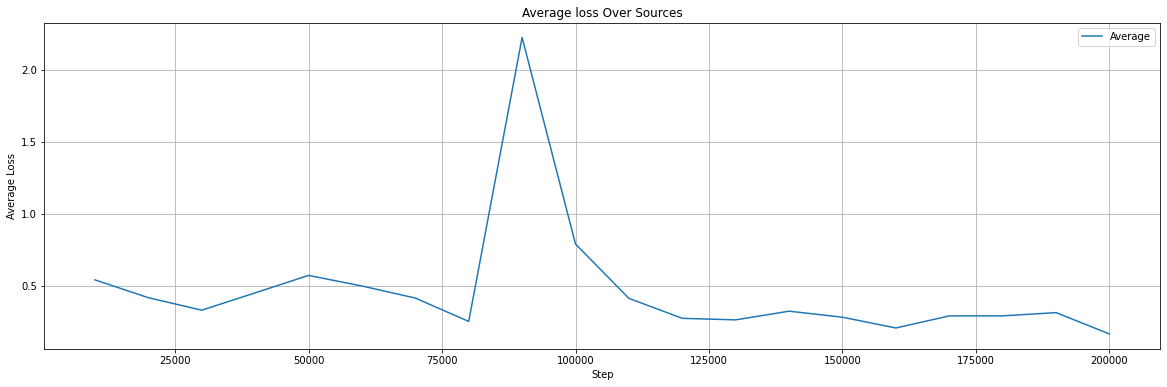

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_sources(metrics, metric, ylim=None):
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label='Average')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    if metric == 'accuracy':
        # Find the maximum value of the metric and its corresponding step
        max_value = mean_data[metric].max()
        max_step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Maximum average {metric}: {max_value:.4f} at step {max_step}')
    elif metric == 'loss':
        # Find the minimum value of the metric and its corresponding step
        min_value = mean_data[metric].min()
        min_step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Minimum average {metric}: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} Over Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True) 
    plt.show()

plot_average_metric_over_sources(classification_scores, 'accuracy', ylim=(0.6, 1))
plot_average_metric_over_sources(classification_scores, 'loss')